# Deep Belief Network, MNIST

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Set Configs

In [3]:
BATCH_SIZE = 64

## Load Datasets

In [4]:
mnist_datasets = torchvision.datasets.MNIST('./datasets/MNIST/', train=True, download=False,
                                      transform=transforms.Compose([transforms.ToTensor(),
                                                                    transforms.Normalize((0.1307,), (0.3081,))]))

In [5]:
mnist_datasets.train_data = mnist_datasets.train_data.type(torch.FloatTensor)/255.

## Visualize Datasets

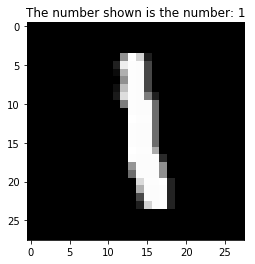

In [6]:
idx = np.random.randint(10)
image = mnist_datasets.train_data[idx]
plt.imshow(image, cmap='gray')
plt.title("The number shown is the number: {}".format(mnist_datasets.train_labels[idx]))
plt.show()

## Import The [Network](https://www.cs.toronto.edu/~hinton/absps/fastnc.pdf)

In [7]:
from DBN import DBNNet

#### Initialize DBN Network

In [8]:
dbn = DBNNet(visible_units=28*28,
             hidden_units=[28*28, 18*18],
             k=5,
             learning_rate=0.01,
             learning_rate_decay=True,
             xavier_init=True,
             increase_to_cd_k=False,
             use_gpu=False)

## Pre-Train DBN Network

In [9]:
n_epochs = 1
batch_size = 10

dbn.train_static(mnist_datasets.train_data, mnist_datasets.train_labels, n_epochs, batch_size)

Training the RBM layer index: 1
RBM Net is fitting: 6000it [01:31, 65.73it/s]
Epoch: 1, Average Cost: 0.2195945680141449, STD Cost: 0.10674349218606949, Average Gradient: 14318.4609375, STD Gradient: 2903.622802734375
Training the RBM layer index: 2
RBM Net is fitting: 6000it [00:45, 130.96it/s]
Epoch: 1, Average Cost: 1.3897277116775513, STD Cost: 0.16468478739261627, Average Gradient: 15515.642578125, STD Gradient: 1124.92724609375


#### Visualizing trained layer

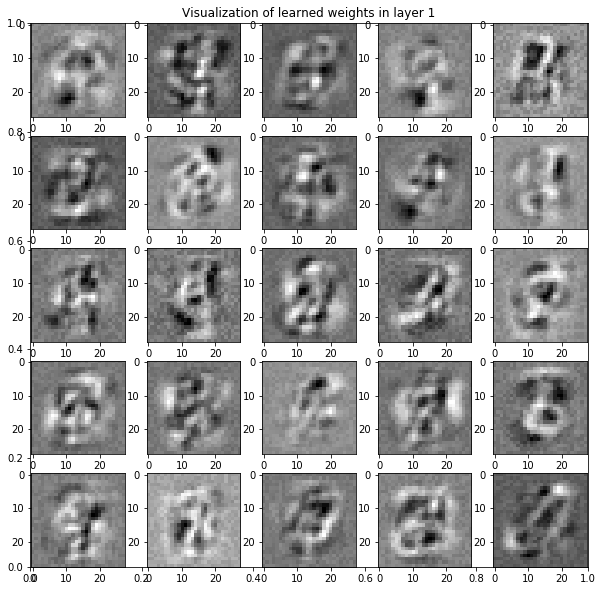

In [10]:
idx_layer = 1
learned_weights = dbn.rbm_layers[idx_layer-1].W.transpose(0,1).numpy()
fig = plt.figure(3, figsize=(10,10))
plt.title('Visualization of learned weights in layer {}'.format(idx_layer))
for i in range(25):
    sub = fig.add_subplot(5, 5, i+1)
    sub.imshow(learned_weights[i,:].reshape((28,28)), cmap=plt.cm.gray)

plt.savefig('./images/dbn_trained_layer_{}.png'.format(idx_layer))
plt.show()

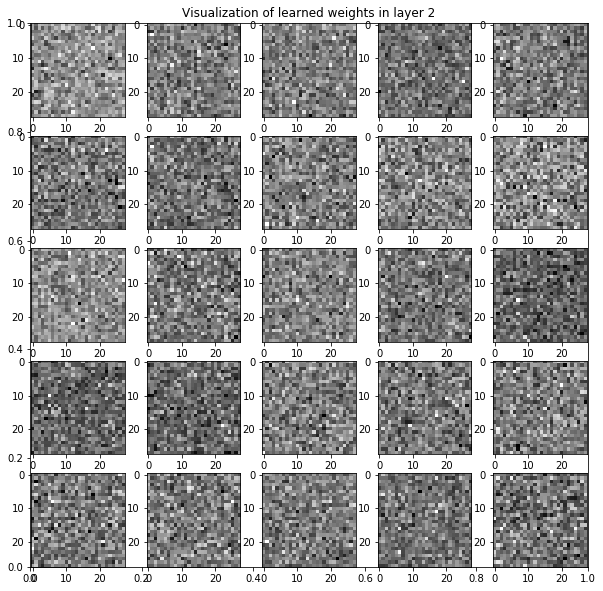

In [11]:
idx_layer = 2
learned_weights = dbn.rbm_layers[idx_layer-1].W.transpose(0,1).numpy()
fig = plt.figure(3, figsize=(10,10))
plt.title('Visualization of learned weights in layer {}'.format(idx_layer))
for i in range(25):
    sub = fig.add_subplot(5, 5, i+1)
    sub.imshow(learned_weights[i,:].reshape((28,28)), cmap=plt.cm.gray)

plt.savefig('./images/dbn_trained_layer_{}.png'.format(idx_layer))
plt.show()

## Train DBN Network

In [12]:
digits = 5
particular_mnist = []

limit = mnist_datasets.train_data.shape[0]
for i in range(limit):
    if(mnist_datasets.train_labels[i] == digits):
        particular_mnist.append(mnist_datasets.train_data[i].numpy())

In [13]:
print('Number of digits: {}'.format(len(particular_mnist)))

Number of digits: 5421


In [14]:
train_data = torch.stack([torch.Tensor(i) for i in particular_mnist])
train_label = torch.stack([torch.Tensor(digits) for i in range(len(particular_mnist))])

In [15]:
n_epochs = 20
dbn.train_static(train_data, train_label, n_epochs, batch_size)

Training the RBM layer index: 1
RBM Net is fitting: 542it [00:08, 61.86it/s]
Epoch: 1, Average Cost: 0.14742513000965118, STD Cost: 0.01737794280052185, Average Gradient: 11811.2236328125, STD Gradient: 624.2584838867188
RBM Net is fitting: 542it [00:09, 56.07it/s]
Epoch: 2, Average Cost: 0.13621023297309875, STD Cost: 0.01630747877061367, Average Gradient: 11621.1279296875, STD Gradient: 606.2876586914062
RBM Net is fitting: 542it [00:10, 53.99it/s]
Epoch: 3, Average Cost: 0.1322956681251526, STD Cost: 0.01649904064834118, Average Gradient: 11599.0234375, STD Gradient: 594.6214599609375
RBM Net is fitting: 542it [00:07, 68.15it/s]
Epoch: 4, Average Cost: 0.13006596267223358, STD Cost: 0.016198964789509773, Average Gradient: 11593.9208984375, STD Gradient: 622.2324829101562
RBM Net is fitting: 542it [00:08, 64.15it/s]
Epoch: 5, Average Cost: 0.1285872906446457, STD Cost: 0.016007941216230392, Average Gradient: 11601.5654296875, STD Gradient: 621.4065551757812
RBM Net is fitting: 542it 

The original digits: 5


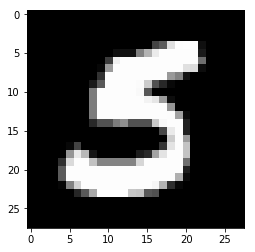

The reconstructed image


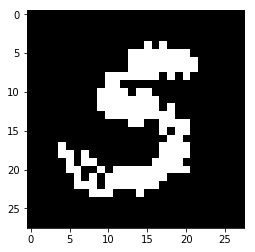

In [26]:
idx = 1993
image = mnist_datasets.train_data[idx]
reconstructed_image = image.view(1, -1).type(torch.FloatTensor)

_, reconstructed_image = dbn.reconstruct(reconstructed_image)
reconstructed_image = reconstructed_image.view((28,28))

print('The original digits: {}'.format(mnist_datasets.train_labels[idx]))
plt.imshow(image, cmap='gray')
plt.savefig('./images/dbn_original_image.png')
plt.show()

print('The reconstructed image')
plt.imshow(reconstructed_image, cmap='gray')
plt.savefig('./images/dbn_reconstructed_image.png')
plt.show()

---